# Importing Modules

The necessary modules are : os, opencv, numpy, tqdm, matplotlib and tensorflow

In [1]:
import os
import cv2
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt


from tensorflow.keras.models import model_from_json

# Loading and preprocessing the image

## Loading the Image

We first load the image to predict. 

They are stored in a list X.

Moreover, the images are resized to 64x64

In [2]:
img_fl = '22'

img = cv2.imread('data/production/{}'.format(img_fl)+'.png', cv2.IMREAD_GRAYSCALE)
resized_img = cv2.resize(img,(64, 64), interpolation = cv2.INTER_CUBIC)

X = []
X.append(resized_img)

## Preprocessing

The X list are converted to numpy arrays for convenience. Furthermore, the images are normalized.

In [3]:
X_test = np.array(X)

X_test = X_test / 255

print(X_test.shape)

(1, 64, 64)


# Constructing Model

## Loading the model

We first load the json file corresponding the model. 

After, the weights are loaded.

In [4]:
json_file = open('models/modelP.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [5]:
loaded_model.load_weights("models/modelW.h5")

# Predict the image and plot

## Predict the image

The image are predicted and save in yp array

In [6]:
yp = loaded_model.predict(x=X_test)

## Edit image for a better representation

The input will be shown in 512px in color mode

The mask will be resized to 512px 

In [7]:
yp.shape

(1, 64, 64, 1)

In [8]:
img = cv2.imread('data/production/{}'.format(img_fl)+'.png', cv2.IMREAD_COLOR)
resized_img = cv2.resize(img,(512, 512), interpolation = cv2.INTER_CUBIC)

msk = yp[0]
msk = cv2.resize(msk,(512, 512), interpolation = cv2.INTER_CUBIC)
msk = np.round(msk,0)

## Plot image

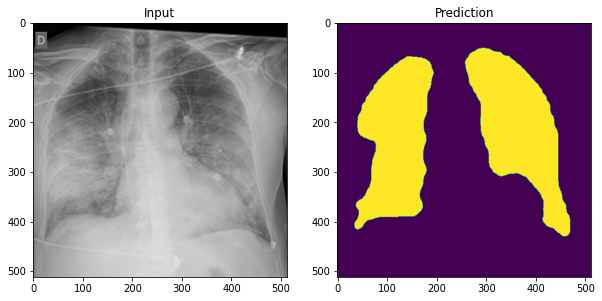

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(resized_img)
plt.title('Input')
plt.subplot(1,2,2)
plt.imshow(msk)
plt.title('Prediction')
plt.show()